In [ ]:
#1. working directory 
import os
os.getcwd()
os.chdir('/Users/Caroline/Desktop')

In [2]:
#2. packages
from collections import defaultdict
import pandas as pd
import numpy as np
import json
import gzip
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [14]:
#3. function to unzip cags and create CAG size function
def read_json_gz(fp):
    return json.load(gzip.open(fp, "rt"))

def read_CAG_size(fp):
    cags = read_json_gz(fp)
    
    cag_sizes = {}
    
    for cag_name, list_of_genes_in_cag in cags.items():
        number_of_genes_in_cag = len(list_of_genes_in_cag)
        cag_sizes[cag_name] = number_of_genes_in_cag
        
    return cag_sizes

In [12]:
#my way of box plot

def create_df(list_of_fps):
    """Compare the sizes of a list of multiple CAGs as box plot"""
    
    # Make a DataFrame with the sizes of each CAG from each file
    data = []
    
    for fp in list_of_fps:
        cag_sizes = read_CAG_size(fp)
        
        for cag_name, cag_size in cag_sizes.items():
            
            data.append({
                    "file_name": fp.replace('.cags.json.gz', ''),
                    "cag_name": cag_name,
                    "cag_size": cag_size
                })
            
    df = pd.DataFrame(data)
    return df 

df=create_df([
     "40_samples_sum_0.2_2019-01-21.cags.json.gz",
     "40_samples_sum_0.3_2019-01-21.cags.json.gz",
     "50_samples_sum_0.3_2019-01-09.cags.json.gz"
 ])


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


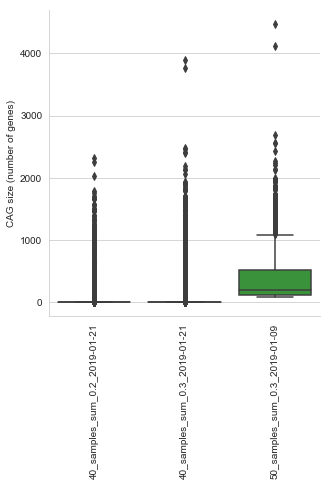

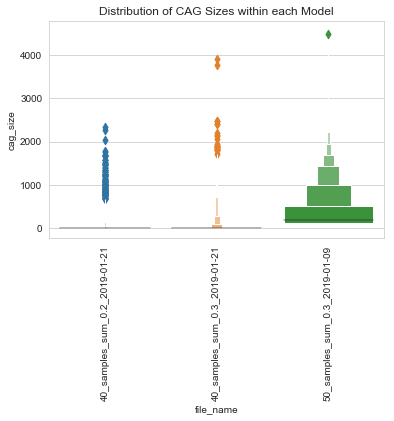

<Figure size 432x288 with 0 Axes>

In [13]:
g = sns.factorplot(data=df, x="file_name", y="cag_size",kind="box")
g.set_xticklabels(rotation=90)
g.set_xlabels("")
g.set_ylabels("CAG size (number of genes)")
plt.show()

f = sns.boxenplot(data=df, x="file_name", y="cag_size")
plt.title('Distribution of CAG Sizes within each Model')
plt.setp(f.get_xticklabels(), rotation=90)
plt.show()
plt.savefig("output.png")

In [6]:
#4. change dataframe to be friendly to cum sum graph

df2=df.filter(['cag_size','file_name'],axis=1)
df2.sort_values("file_name")

file_1 = df2.loc[df2["file_name"] == '40_samples_sum_0.2_2019-01-21']
file_2 = df2.loc[df2["file_name"] == '40_samples_sum_0.3_2019-01-21']
file_3 = df2.loc[df2["file_name"] == '50_samples_sum_0.3_2019-01-09']

#turn file_1 into column of cag_sizes
file_1=file_1.drop(['file_name'],axis=1)
file_1=file_1.sort_values('cag_size',ascending=False)
file_1=file_1.rename(columns={'cag_size':'file_1_column'})
file_1['file_1_cumsum'] = file_1['file_1_column'].cumsum()

#turn file_2 into column of cag_sizes
file_2=file_2.drop(['file_name'],axis=1)
file_2=file_2.sort_values('cag_size',ascending=False)
file_2=file_2.rename(columns={'cag_size':'file_2_column'})
file_2['file_2_cumsum'] = file_2['file_2_column'].cumsum()

#turn file_3 into column of cag_sizes
file_3=file_3.drop(['file_name'],axis=1)
file_3=file_3.sort_values('cag_size',ascending=False)
file_3=file_3.rename(columns={'cag_size':'file_3_column'})
file_3['file_3_cumsum'] = file_3['file_3_column'].cumsum()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


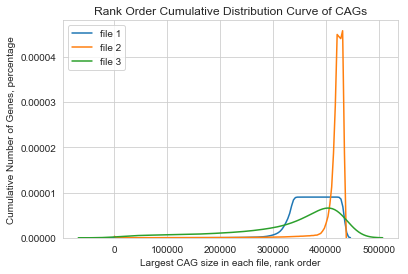

In [10]:
j=sns.distplot(file_1[['file_1_cumsum']], hist=False,label="file 1")
j=sns.distplot(file_2[['file_2_cumsum']], hist=False,label="file 2")
j=sns.distplot(file_3[['file_3_cumsum']], hist=False,label="file 3")
fig=plt.title('Rank Order Cumulative Distribution Curve of CAGs')
fig=plt.ylabel('Cumulative Number of Genes, percentage')
fig=plt.xlabel("Largest CAG size in each file, rank order")

plt.savefig("cdf.png")
plt.show()

In [63]:
print(df.head())

  cag_name  cag_size                      file_name
0        0      2326  40_samples_sum_0.2_2019-01-21
1        1      2261  40_samples_sum_0.2_2019-01-21
2        2      2029  40_samples_sum_0.2_2019-01-21
3        3      1508  40_samples_sum_0.2_2019-01-21
4        4      1017  40_samples_sum_0.2_2019-01-21


In [ ]:
#original code to count up and make dataframe of counts of different cags 

counter = defaultdict(int)

count = 1
for x in ['a', 'b', 'c']:
    counter[(x, 'SECOND_ITEM')] += count
    count += 1


print("Done with step A")
print(counter)
print("")

#is this a different counter? 
counter=pd.Series(counter).sort_values(ascending=False)

print("Done with step B")
print(counter)
print("")

print("Running step C")
for tuple_key, value in counter.items():
    item1, item2 = tuple_key
    print("Item 1: {}".format(item1))
    print("Item 2: {}".format(item2))
    print("Value: {}".format(value))
    print("moving on to the next iteration in the loop\n") #/n means new line